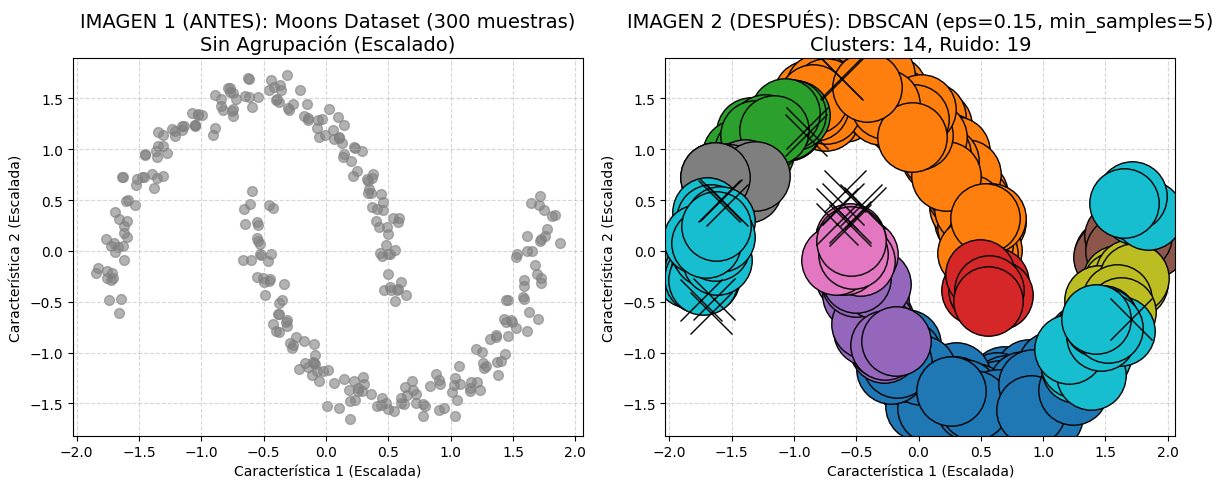

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# ----------------------------------------------------------------------
#  Generación del Dataset Moons (Sintético)
# ----------------------------------------------------------------------

n_samples_val = 300

X, y_true = make_moons(
    n_samples=n_samples_val,
    noise=0.05,  # Ruido bajo para que las lunas no se toquen demasiado
    random_state=42
)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------------------------------------------------
# Visualización "ANTES" (IMAGEN 1: Datos Originales Sin Agrupar)
# ----------------------------------------------------------------------

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='gray', s=50, alpha=0.6)
plt.title(f'IMAGEN 1 (ANTES): Moons Dataset ({n_samples_val} muestras)\nSin Agrupación (Escalado)', fontsize=14)
plt.xlabel('Característica 1 (Escalada)')
plt.ylabel('Característica 2 (Escalada)')
plt.grid(True, linestyle='--', alpha=0.5)

# PARÁMETROS DE DBSCAN:
eps_val = 0.15
min_samples_val = 5

db = DBSCAN(eps=eps_val, min_samples=min_samples_val)
clusters = db.fit_predict(X_scaled)

# ----------------------------------------------------------------------
#  Visualización "DESPUÉS" (IMAGEN 2: Datos Agrupados por DBSCAN)
# ----------------------------------------------------------------------

plt.subplot(1, 2, 2)
unique_labels = set(clusters)
# Usamos 'tab10' para la visualización
colors = [plt.cm.tab10(each) for each in range(len(unique_labels))]

#  Dibujar los clústeres
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Puntos de Ruido (etiqueta -1): Negro y con 'x'
        face_color = 'k'
        marker = 'x'
        size = 30
    else:
        # Clústeres: de color y 'o'
        face_color = tuple(col)
        marker = 'o'
        size = 50

    class_member_mask = (clusters == k)
    xy = X_scaled[class_member_mask]

    plt.plot(xy[:, 0], xy[:, 1], marker, markerfacecolor=face_color,
             markeredgecolor='k' if k != -1 else 'k', markersize=size, linestyle='')

n_clusters_found = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = np.sum(clusters == -1)

plt.title(f'IMAGEN 2 (DESPUÉS): DBSCAN (eps={eps_val}, min_samples={min_samples_val})\nClusters: {n_clusters_found}, Ruido: {n_noise}', fontsize=14)
plt.xlabel('Característica 1 (Escalada)')
plt.ylabel('Característica 2 (Escalada)')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

